<a href="https://colab.research.google.com/github/tranle1411/HousingSalePricePredictor/blob/main/BUSA310_Group_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Organization

Libraries

In [ ]:
import pandas as pd #for data analysis#
import numpy as np #for data analysis#
import matplotlib.pyplot as plt #for visualization#
import seaborn as sns #for better looking visualization
import scipy.stats as stats
import statsmodels.api as sm #library for statistics analysis#
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.stats.anova import anova_lm
!pip install ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
!pip install ml_metrics

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

import os

# List files and directories in the specified path
os.listdir('/content/drive/My Drive/BUS/BUS310/Data_BUS310') #adjust the address to your own

# Correct path to your CSV file
file_path = '/content/drive/My Drive/BUS/BUS310/Data_BUS310/housing_price_full_sample.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

#Display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame to confirm successful loading
df.head()

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.5/890.5 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=cf95832e7f475ca1a14ef8669d3baa40db40dec71b0969323c1f65200c4bdb70
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting unins

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print(len(df.columns))

81


## 1.1.	Missing data and imputing missing data
###Check missing data

In [ ]:
missing_values = df.isnull().sum()
mising_values = missing_values[missing_values > 0]
missing_values

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,486
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,1
SaleCondition,0


###Impute missing

In [ ]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer for numerical variables using the mean strategy
numerical_imputer = SimpleImputer(strategy='mean')

# Create a SimpleImputer for categorical variables using the most frequent strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Select numerical and categorical columns from your dataframe
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

# Apply the imputers to the respective columns
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Check if there are any remaining missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)


Series([], dtype: int64)


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Gd,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,Ex,MnPrv,Shed,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,Ex,MnPrv,Shed,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,Ex,MnPrv,Shed,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,Ex,MnPrv,Shed,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,Ex,MnPrv,Shed,0.0,12.0,2008.0,WD,Normal,250000.0


## 1.2. Label encoding/factorizing the remaining character variables

In [ ]:
# Make a copy of the current data frame
df_original = df.copy(deep=True)

# Create dummy variables for categorical columns
df = pd.get_dummies(df, drop_first=True)

# Display the updated DataFrame with dummy variables
df.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,

## 1.3. Changing some numeric variables into categorical variables
###Check how many years of data do we have

In [ ]:
unique_years_count = df['YrSold'].nunique()
print(f'Number of unique years: {unique_years_count}')

Number of unique years: 5


###Convert year and month sold, year built, and MSSubClass from numeric variables into dummy variables.

In [ ]:
categorical_var_names = ['MSSubClass', 'MoSold', 'YearBuilt']
df = pd.get_dummies(df, columns=categorical_var_names, drop_first=False)
df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSSubClass

#2.	Exploratory Data Analysis
##2.2.	 Exploring important variables
###Check the basic descriptive statistics for SalePrice

In [ ]:
sales_price_stats = df['SalePrice'].describe().round(2)
print(sales_price_stats)

count      2919.00
mean     180052.86
std       57381.56
min       34900.00
25%      154795.00
50%      176735.00
75%      191896.00
max      755000.00
Name: SalePrice, dtype: float64


###Box plot that show the distribution of SalePrice

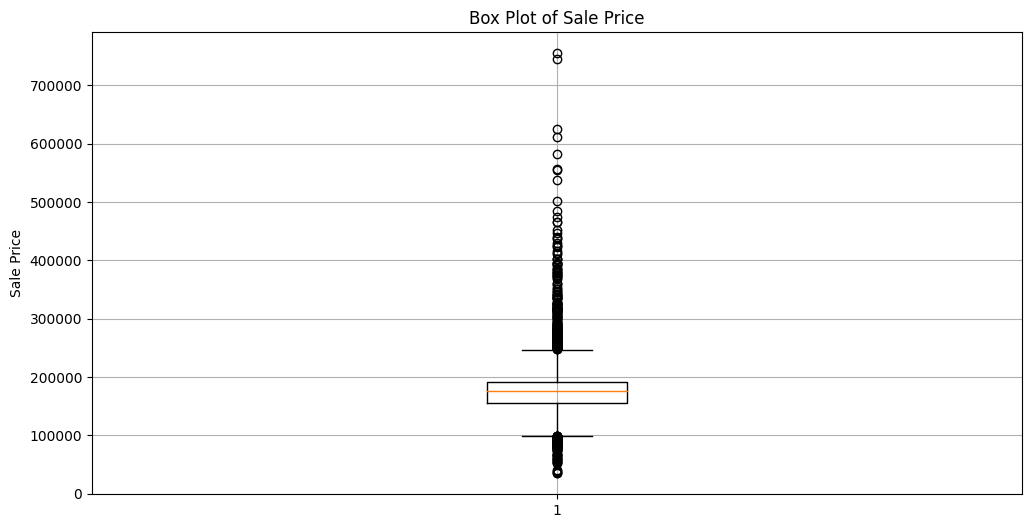

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['SalePrice'])
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price')
plt.grid()
plt.show()

###Histogram of SalePrice

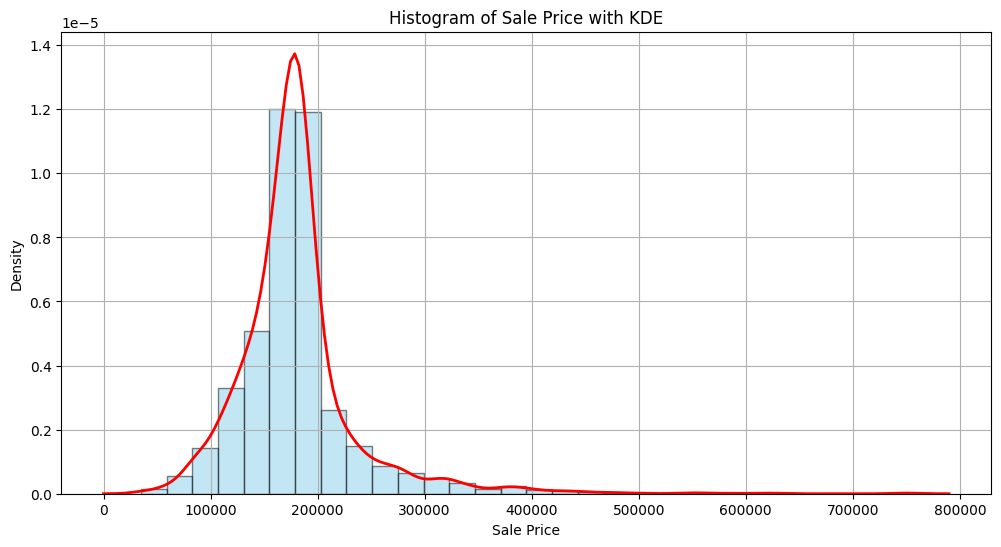

In [ ]:
plt.figure(figsize=(12, 6))
count, bin, ignored = plt.hist(df['SalePrice'], bins=30, density = True, color='skyblue', edgecolor='black', alpha = 0.5)
kde = sns.kdeplot(df['SalePrice'], color='red', lw=2)
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Histogram of Sale Price with KDE')
plt.grid()
plt.show()

###check how many numerical variables

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
num_numerical_vars = len(numerical_cols)
print(f"Number of numerical variables: {num_numerical_vars}")


Number of numerical variables: 35


###Sorted Correlations between each numerical predictor and SalePrice

In [ ]:
numeric_var = df.select_dtypes(include=np.number)
cor_num_var = numeric_var.corr()
cor_sorted = cor_num_var['SalePrice'].sort_values(ascending=False)
top_10_correlations = cor_sorted[1:10] # Exclude SalePrice itself
print(top_10_correlations)

GrLivArea       0.588010
OverallQual     0.550911
TotRmsAbvGrd    0.469800
GarageCars      0.469249
GarageArea      0.464809
1stFlrSF        0.462865
TotalBsmtSF     0.453212
FullBath        0.433711
MasVnrArea      0.353953
Name: SalePrice, dtype: float64


###Heatmap of the correlation pairs for the top 10 variables that has the highest correlation with SalePrice

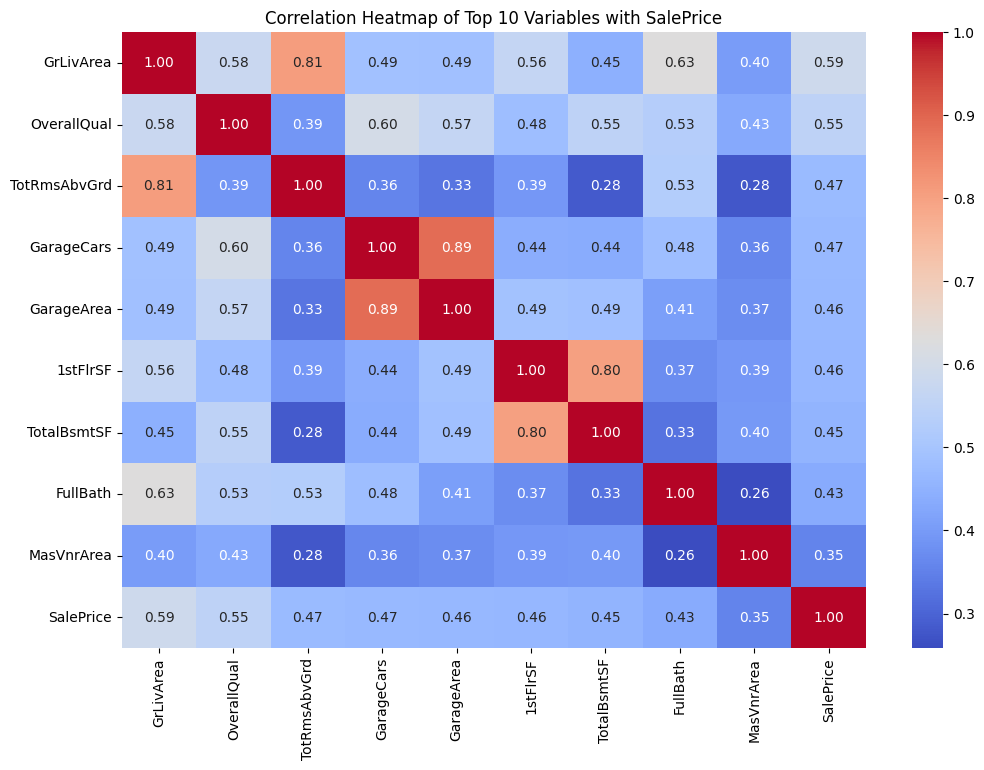

In [ ]:
heatmap_df = df[top_10_correlations.index.tolist() + ['SalePrice']]
correlation_matrix = heatmap_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Top 10 Variables with SalePrice')
plt.show()

###Box plot of the Overall Quality on SalePrice

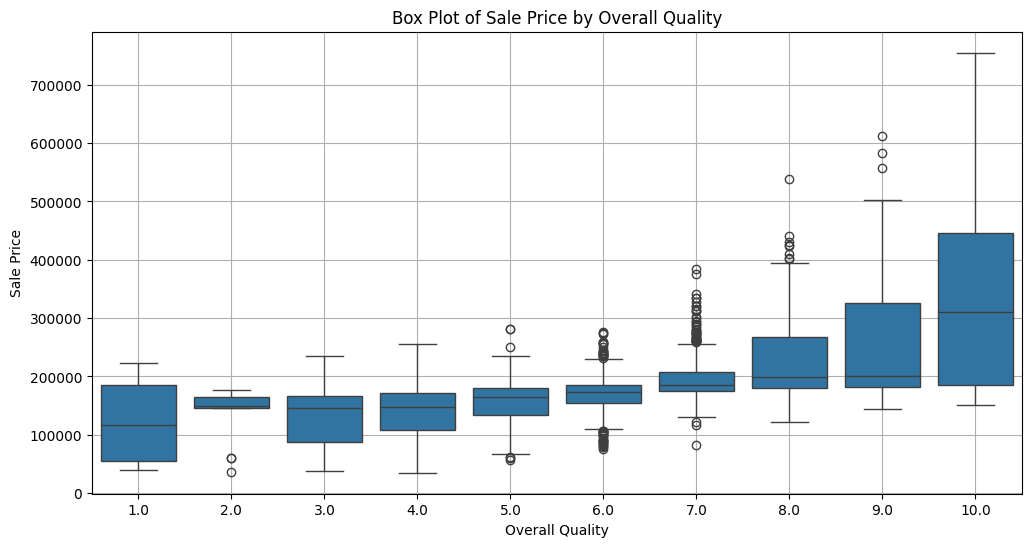

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by Overall Quality')
plt.grid()
plt.show()


###Scatter plot between GrLivArea and SalePrice

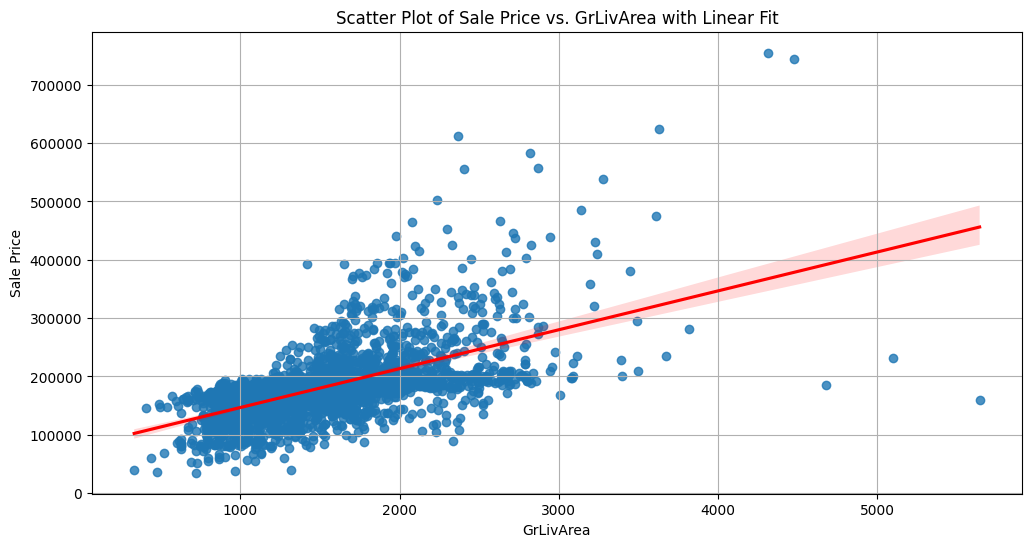

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x='GrLivArea', y='SalePrice', data=df, line_kws={'color': 'red'})
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.title('Scatter Plot of Sale Price vs. GrLivArea with Linear Fit')
plt.grid()
plt.show()

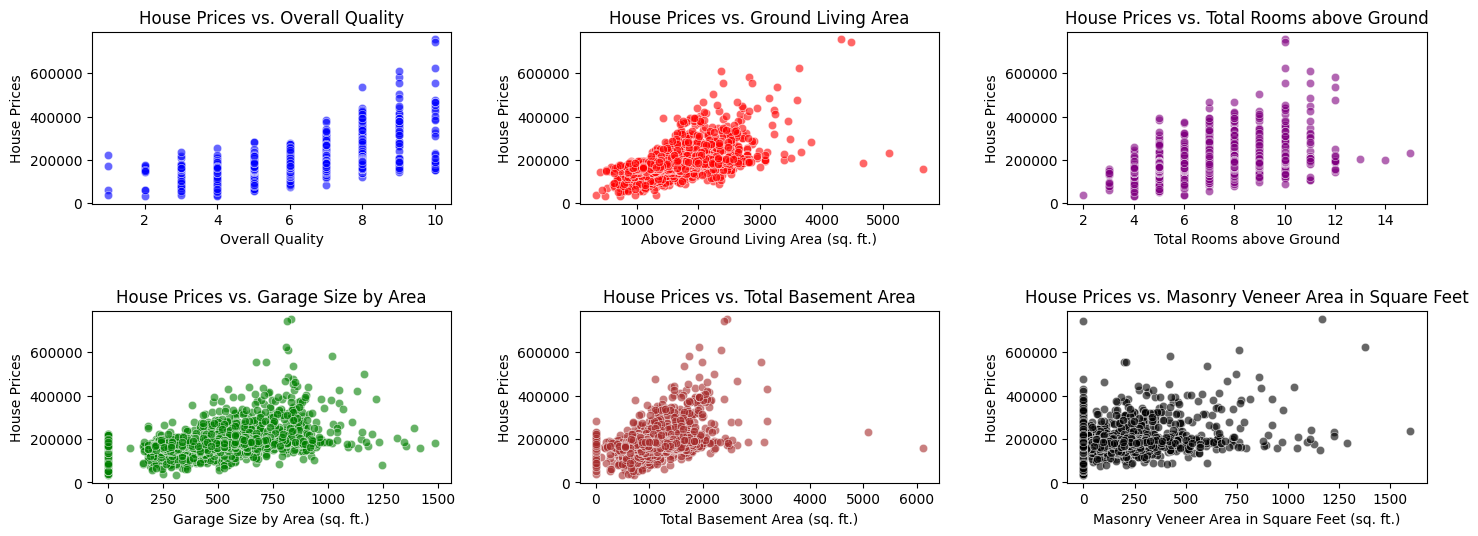

In [ ]:
# Source: https://machinelearningmastery.com/feature-relationships-101/
# Setting up the figure and axes
fig, ax = plt.subplots(2, 3, figsize=(15, 6))

# Scatter plot for SalePrice vs. OverallQual
sns.scatterplot(x=df['OverallQual'], y=df['SalePrice'], ax=ax[0, 0], color='blue', alpha=0.6)
ax[0, 0].set_title('House Prices vs. Overall Quality')
ax[0, 0].set_ylabel('House Prices')
ax[0, 0].set_xlabel('Overall Quality')

# Scatter plot for SalePrice vs. GrLivArea
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'], ax=ax[0, 1], color='red', alpha=0.6)
ax[0, 1].set_title('House Prices vs. Ground Living Area')
ax[0, 1].set_ylabel('House Prices')
ax[0, 1].set_xlabel('Above Ground Living Area (sq. ft.)')

# Scatter plot for SalePrice vs. 1stFlrSF
sns.scatterplot(x=df['TotRmsAbvGrd'], y=df['SalePrice'], ax=ax[0, 2], color='purple', alpha=0.6)
ax[0, 2].set_title('House Prices vs. Total Rooms above Ground')
ax[0, 2].set_ylabel('House Prices')
ax[0, 2].set_xlabel('Total Rooms above Ground')

# Scatter plot for SalePrice vs. GarageArea
sns.scatterplot(x=df['GarageArea'], y=df['SalePrice'], ax=ax[1, 0], color='green', alpha=0.6)
ax[1, 0].set_title('House Prices vs. Garage Size by Area')
ax[1, 0].set_ylabel('House Prices')
ax[1, 0].set_xlabel('Garage Size by Area (sq. ft.)')

# Scatter plot for SalePrice vs. TotalBsmtSF
sns.scatterplot(x=df['TotalBsmtSF'], y=df['SalePrice'], ax=ax[1, 1], color='brown', alpha=0.6)
ax[1, 1].set_title('House Prices vs. Total Basement Area')
ax[1, 1].set_ylabel('House Prices')
ax[1, 1].set_xlabel('Total Basement Area (sq. ft.)')

# Scatter plot for SalePrice vs. MasVnrArea
sns.scatterplot(x=df['MasVnrArea'], y=df['SalePrice'], ax=ax[1, 2], color='black', alpha=0.6)
ax[1, 2].set_title('House Prices vs. Masonry Veneer Area in Square Feet')
ax[1, 2].set_ylabel('House Prices')
ax[1, 2].set_xlabel('Masonry Veneer Area in Square Feet (sq. ft.)')

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

###2 Bar charts of the average SalePrice for and the number of sales for year sold

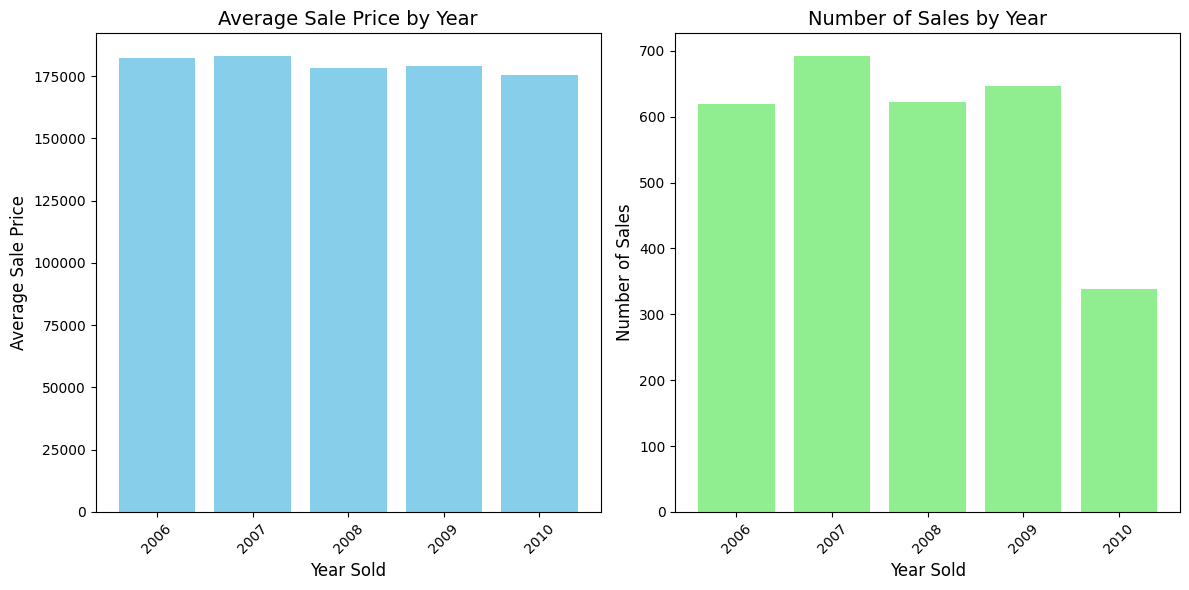

In [ ]:
#calculate the average SalePrice for each year
mean_sale_price = df.groupby('YrSold')['SalePrice'].mean().reset_index()

#calculate the numberof observations for each year
count_observations = df.groupby('YrSold').size().reset_index(name='Count')

#create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#bar chart for average Sale Price by year
axs[0].bar(mean_sale_price['YrSold'], mean_sale_price['SalePrice'], color='skyblue')
axs[0].set_title('Average Sale Price by Year', fontsize=14)
axs[0].set_xlabel('Year Sold', fontsize=12)
axs[0].set_ylabel('Average Sale Price', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)

#bar chartt for number of observations
axs[1].bar(count_observations['YrSold'], count_observations['Count'], color='lightgreen')
axs[1].set_title('Number of Sales by Year', fontsize=14)
axs[1].set_xlabel('Year Sold', fontsize=12)
axs[1].set_ylabel('Number of Sales', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

###2 Bar charts that show the average SalePrice for and the number of sales for month sold

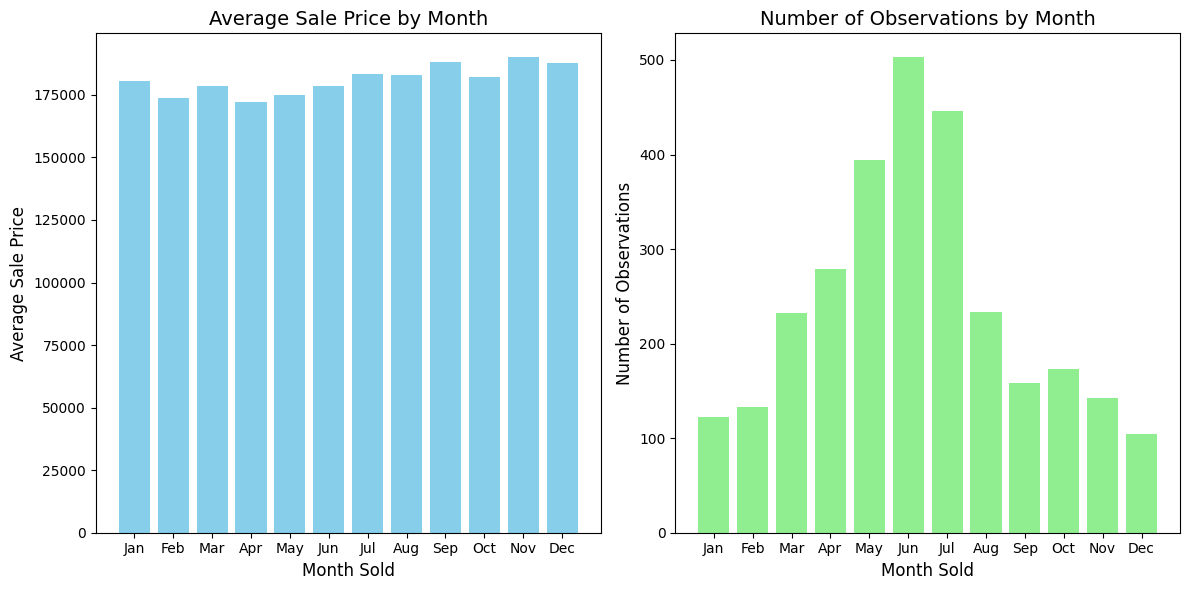

In [ ]:
#calculate the average SalePrice for each month
mean_sale_price = df_original.groupby('MoSold')['SalePrice'].mean().reset_index()

#calculate the number of observations for each month
count_observations = df_original.groupby('MoSold').size().reset_index(name='Count')

#create a figure with two subplots (2 columns, 1 row)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#bar chart for average Sale Price by month
axs[0].bar(mean_sale_price['MoSold'], mean_sale_price['SalePrice'], color='skyblue')
axs[0].set_title('Average Sale Price by Month', fontsize=14)
axs[0].set_xlabel('Month Sold', fontsize=12)
axs[0].set_ylabel('Average Sale Price', fontsize=12)
axs[0].set_xticks(range(1, 13))  # Set x-axis ticks to represent months
axs[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#baar chart for number of observations by month
axs[1].bar(count_observations['MoSold'], count_observations['Count'], color='lightgreen')
axs[1].set_title('Number of Observations by Month', fontsize=14)
axs[1].set_xlabel('Month Sold', fontsize=12)
axs[1].set_ylabel('Number of Observations', fontsize=12)
axs[1].set_xticks(range(1, 13))  # Set x-axis ticks to represent months
axs[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#adjust layout to ensure the subplots don't overlap
plt.tight_layout()

#show the plots
plt.show()

###Bar chart that show the median SalePrice and number of sales by Neighorhood

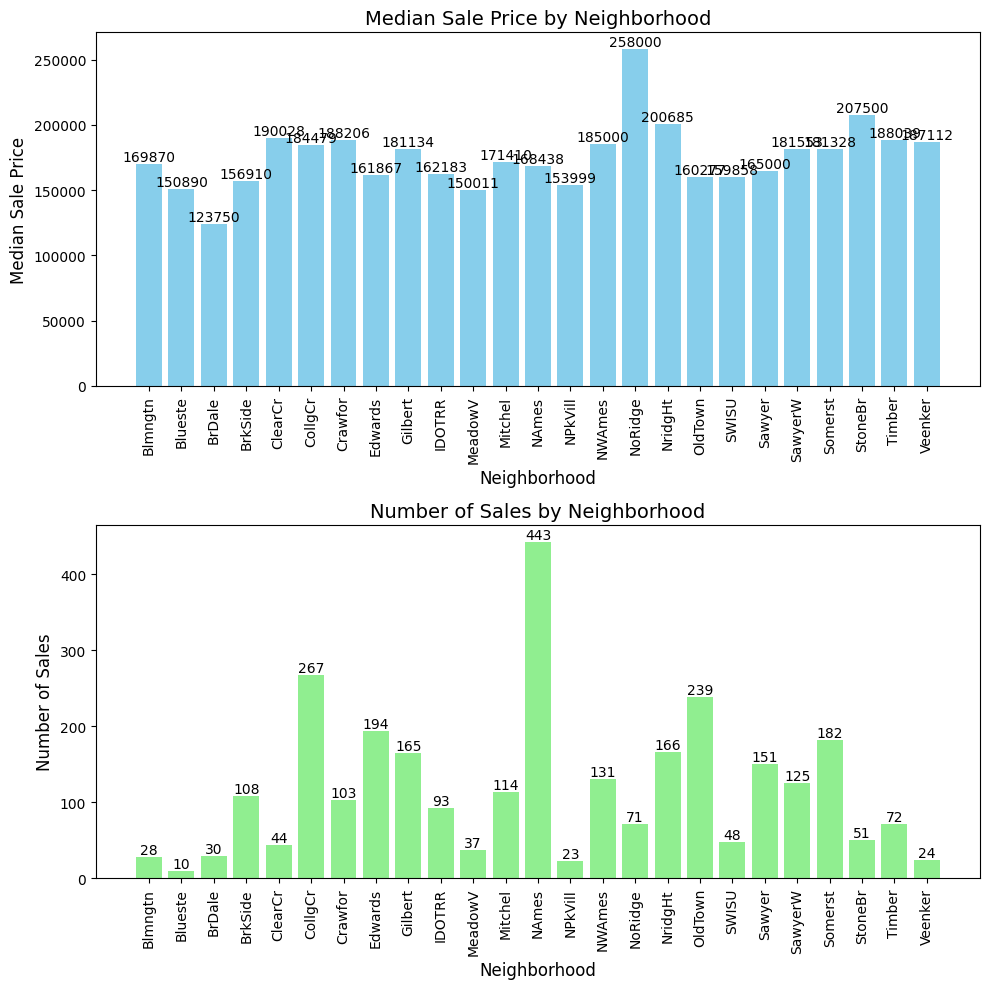

In [ ]:
#calculate the median SalePrice for each neiighborhood
median_sale_price = df_original.groupby('Neighborhood')['SalePrice'].median().reset_index()

#calculate the number of sales for each neighborhood
sales_count = df_original.groupby('Neighborhood')['SalePrice'].count().reset_index(name='Sales Count')

#Merge the 2 df
combined_data = pd.merge(median_sale_price, sales_count, on='Neighborhood')

#Create a combined figuure with 2 subplots (2 rows, 1 column)
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

#Bar chart for median Sale Price by Neighborhood
axs[0].bar(combined_data['Neighborhood'], combined_data['SalePrice'], color='skyblue')
axs[0].set_title('Median Sale Price by Neighborhood', fontsize=14)
axs[0].set_xlabel('Neighborhood', fontsize=12)
axs[0].set_ylabel('Median Sale Price', fontsize=12)
axs[0].tick_params(axis='x', rotation=90)

# Add value labels to the bars
for i, v in enumerate(combined_data['SalePrice']):
    axs[0].text(i, v, f'{v:.0f}', ha='center', va='bottom')

#Bar chart for number of sales
axs[1].bar(combined_data['Neighborhood'], combined_data['Sales Count'], color='lightgreen')
axs[1].set_title('Number of Sales by Neighborhood', fontsize=14)
axs[1].set_xlabel('Neighborhood', fontsize=12)
axs[1].set_ylabel('Number of Sales', fontsize=12)
axs[1].tick_params(axis='x', rotation=90)

# Add value labels to the bars
for i, v in enumerate(combined_data['Sales Count']):
    axs[1].text(i, v, f'{v:.0f}', ha='center', va='bottom')

#adjust layout
plt.tight_layout()

#show the combined plots
plt.show()

###Bar chart that show the median SalePrice and number of sales by MSSubClass

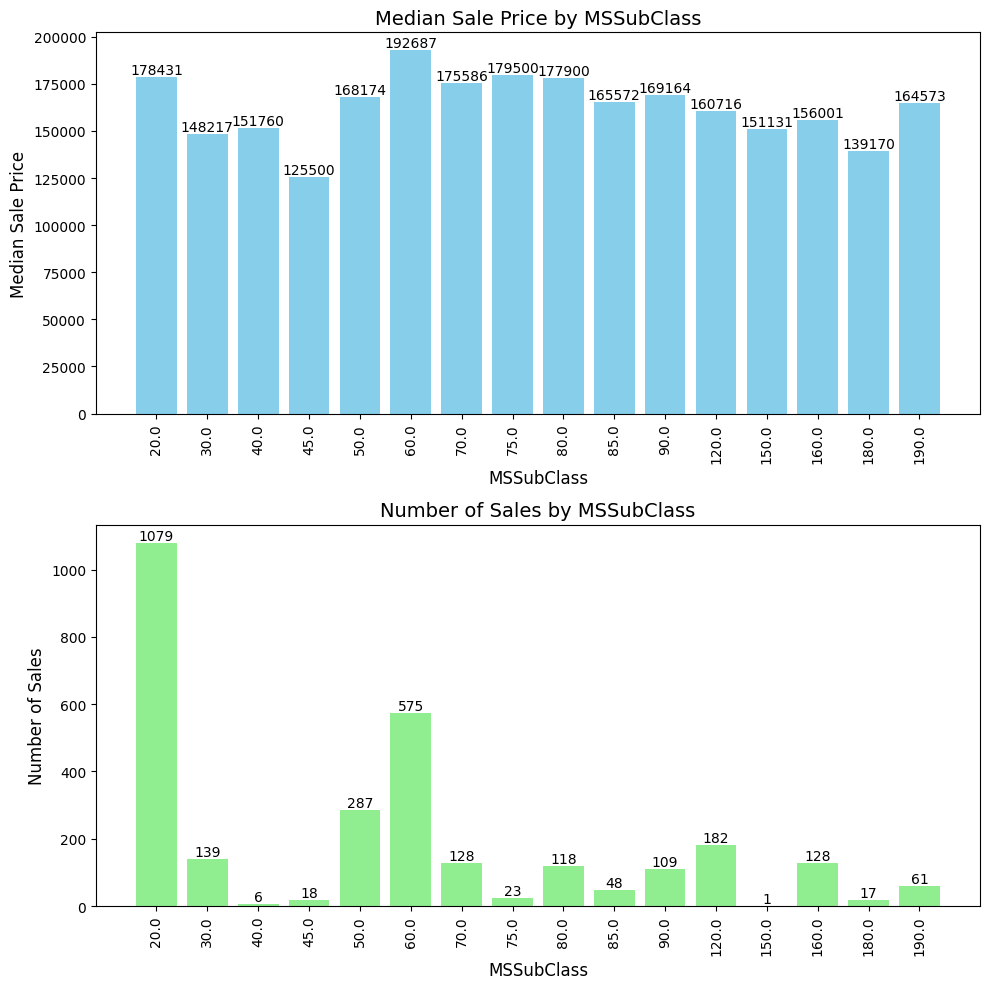

In [ ]:
#calculate the median SalePrice for each MSSubClass
median_sale_price = df_original.groupby('MSSubClass')['SalePrice'].median().reset_index()

#calculate the number of sales for each neighborhood
sales_count = df_original.groupby('MSSubClass')['SalePrice'].count().reset_index(name='Sales Count')

#Merge the 2 df
combined_data = pd.merge(median_sale_price, sales_count, on='MSSubClass')

#Create a combined figuure with 2 subplots (2 rows, 1 column)
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

#Bar chart for median Sale Price by Neighborhood
axs[0].bar(combined_data['MSSubClass'].astype(str), combined_data['SalePrice'], color='skyblue')
axs[0].set_title('Median Sale Price by MSSubClass', fontsize=14)
axs[0].set_xlabel('MSSubClass', fontsize=12)
axs[0].set_ylabel('Median Sale Price', fontsize=12)
axs[0].tick_params(axis='x', rotation=90)

# Add value labels to the bars
for i, v in enumerate(combined_data['SalePrice']):
    axs[0].text(i, v, f'{v:.0f}', ha='center', va='bottom')

#Bar chart for number of sales
axs[1].bar(combined_data['MSSubClass'].astype(str), combined_data['Sales Count'], color='lightgreen')
axs[1].set_title('Number of Sales by MSSubClass', fontsize=14)
axs[1].set_xlabel('MSSubClass', fontsize=12)
axs[1].set_ylabel('Number of Sales', fontsize=12)
axs[1].tick_params(axis='x', rotation=90)

# Add value labels to the bars
for i, v in enumerate(combined_data['Sales Count']):
    axs[1].text(i, v, f'{v:.0f}', ha='center', va='bottom')

#adjust layout
plt.tight_layout()

#show the combined plots
plt.show()

#3.	Regression Analysis
##3.1	Model Selection
###Regression of SalePrice on the top 10 most correlated predictors

In [ ]:
# Select the top 10 most correlated predictors (excluding SalePrice itself)
top_10_predictors = top_10_correlations.index.tolist()

# Create X and y
X = MS(df[top_10_predictors]).fit_transform(df)
y = df['SalePrice']

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     253.4
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:05:10   Log-Likelihood:                -35281.
No. Observations:                2919   AIC:                         7.058e+04
Df Residuals:                    2909   BIC:                         7.064e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept     2.813e+04   4843.101      5.808   

###Correlation between Predictors

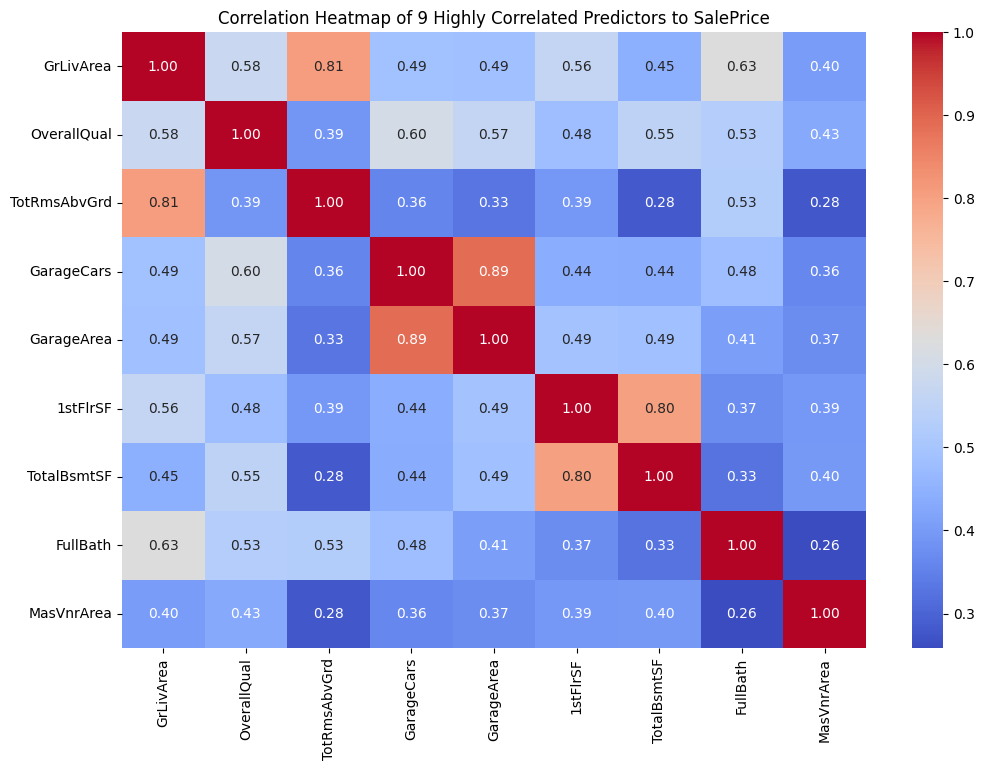

In [ ]:
# Select the top 10 predictors
top_10_predictors = top_10_correlations.index.tolist()
X = df[top_10_predictors]

# Calculate the correlation matrix
correlation_matrix = X.corr()

# You can also visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of 9 Highly Correlated Predictors to SalePrice')
plt.show()

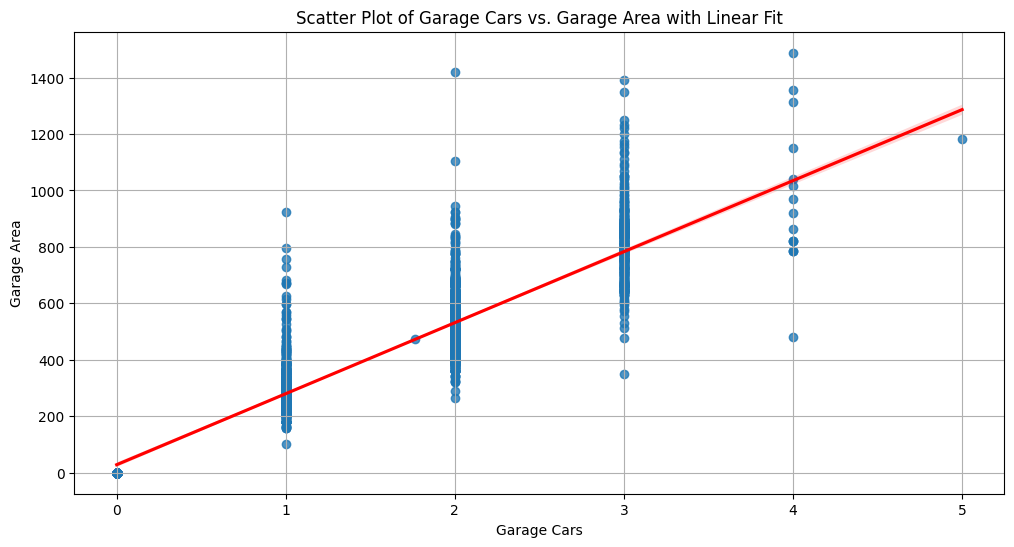

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x='GarageCars', y='GarageArea', data=df, line_kws={'color': 'red'})
plt.xlabel('Garage Cars')
plt.ylabel('Garage Area')
plt.title('Scatter Plot of Garage Cars vs. Garage Area with Linear Fit')
plt.grid()
plt.show()

###Drop Predictors

In [ ]:
final_predictors = [
    predictor for predictor in top_10_predictors
    if predictor not in ['GarageCars', '1stFlrSF', 'FullBath']
]
final_predictors

['GrLivArea',
 'OverallQual',
 'TotRmsAbvGrd',
 'GarageArea',
 'TotalBsmtSF',
 'MasVnrArea']

## Model 1

In [ ]:
X1 = MS(df[final_predictors]).fit_transform(df)
y = df['SalePrice']

# Fit the linear regression model
model1 = sm.OLS(y, X1).fit()

# Print the model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     379.1
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:35:56   Log-Likelihood:                -35284.
No. Observations:                2919   AIC:                         7.058e+04
Df Residuals:                    2912   BIC:                         7.062e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept     2.866e+04   4658.350      6.152   

###Regression with all predictors in the dataset

In [ ]:
# Select all predictors except 'SalePrice'
X_all = MS(df.drop('SalePrice', axis=1)).fit_transform(df)

# Target variable
y = df['SalePrice']

# Add a constant term to the predictor variables for the intercept
X_all = sm.add_constant(X_all)

# Fit the linear regression model
model_all = sm.OLS(y, X_all.astype(float)).fit()

# Print the model summary
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     9.435
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          4.54e-288
Time:                        23:35:57   Log-Likelihood:                -34836.
No. Observations:                2919   AIC:                         7.044e+04
Df Residuals:                    2536   BIC:                         7.273e+04
Df Model:                         382                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept              1.141e+

## Model 2

In [ ]:
# Get the p-values from the model summary
p_values = model_all.pvalues

# Get a list of MoSold dummy variable names
mosold_dummies = [col for col in X_all.columns if col.startswith('MoSold')]

# Create a list of predictors to drop
predictors_to_drop = [predictor for predictor, p_value in p_values.items() if p_value >= 0.05 and predictor != 'const' and predictor not in mosold_dummies]

# Drop the predictors from the model
X2 = MS(X_all.drop(predictors_to_drop, axis=1)).fit_transform(df)

# Refit the model with the remaining predictors
model2 = sm.OLS(y, X2.astype(float)).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     57.81
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:35:58   Log-Likelihood:                -35050.
No. Observations:                2919   AIC:                         7.021e+04
Df Residuals:                    2864   BIC:                         7.054e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept            -2.087e+05 

In [ ]:
print(model1.params[['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'TotalBsmtSF', 'MasVnrArea']])
print(model2.params[['GrLivArea', 'TotRmsAbvGrd', 'TotalBsmtSF']])

OverallQual     8796.993896
GrLivArea         31.054172
TotRmsAbvGrd    3050.858607
GarageArea        29.071017
TotalBsmtSF       15.697982
MasVnrArea        12.578991
dtype: float64
GrLivArea         25.684858
TotRmsAbvGrd    4622.754093
TotalBsmtSF       18.503199
dtype: float64


## Model 1 Train

In [ ]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

lr_model_high_corr = LinearRegression()
lr_model_high_corr.fit(X1_train, y_train)

y_pred = lr_model_high_corr.predict(X1_test)

prediction_df_high_corr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(prediction_df_high_corr.head())

# Calculate MSE
mse = mean_squared_error(y_test, y_pred, squared=True)
print("MSE:", mse)

        Actual      Predicted
2437  180097.0  143816.543655
2470  192687.0  199044.727461
2359  158152.0  139098.694174
789   187500.0  200897.250973
1642  172024.0  212956.581962
MSE: 2008187098.7406816


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


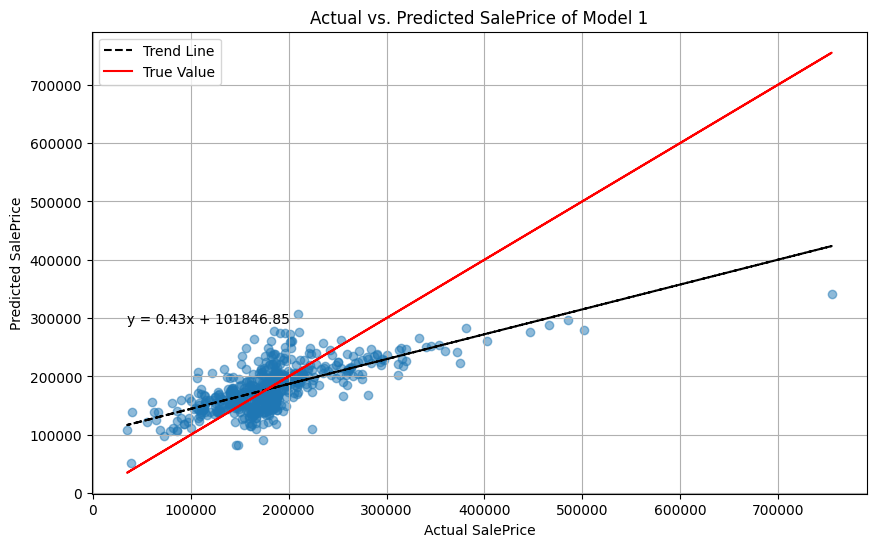

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice of Model 1')

# Add a trend line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='black', linestyle='--', label='Trend Line')

# Add a y=x line (True Value)
plt.plot(y_test, y_test, color='red', label='True Value')

# Calculate the equation of the trend line
slope, intercept = np.polyfit(y_test, y_pred, 1)
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(min(y_test), max(y_pred) * 0.85, equation, color='black')

plt.legend()
plt.grid(True)
plt.show()

## Model 2 Train

In [ ]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

lr_model_high_corr = LinearRegression()
lr_model_high_corr.fit(X2_train, y_train)

y_pred = lr_model_high_corr.predict(X2_test)

prediction_df_high_corr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(prediction_df_high_corr.head())

# Calculate MSE
mse = mean_squared_error(y_test, y_pred, squared=True)
print("MSE:", mse)

        Actual      Predicted
2437  180097.0  157134.450037
2470  192687.0  207248.359164
2359  158152.0  134060.011538
789   187500.0  216096.427159
1642  172024.0  187831.143776
MSE: 2040870079.2379167


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


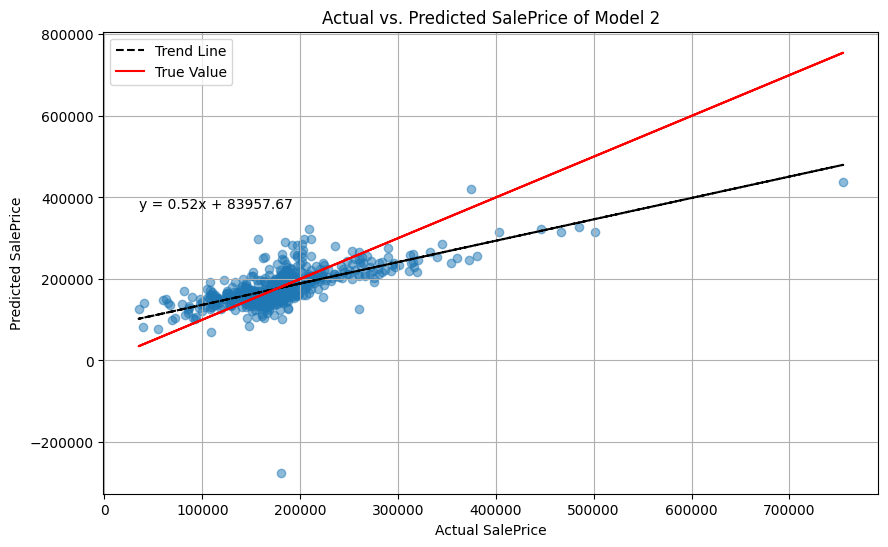

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice of Model 2')

# Add a trend line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='black', linestyle='--', label='Trend Line')

# Add a y=x line (True Value)
plt.plot(y_test, y_test, color='red', label='True Value')

# Calculate the equation of the trend line
slope, intercept = np.polyfit(y_test, y_pred, 1)
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(min(y_test), max(y_pred) * 0.85, equation, color='black')

plt.legend()
plt.grid(True)
plt.show()